# Author: GG3DAGP0220_StanleyAnanda

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load Dataset

About Dataset:

This dataset contains 319795 rows and 18 columns

1. HeartDisease : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)     
2. BMI: Body Mass Index (BMI)
3. Smoking: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
4. AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)
5. Stroke: (Ever told) (you had) a stroke?
6. PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30
7. MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good?
8. DiffWalking: Do you have serious difficulty walking or climbing stairs?
9. Sex : Female or Male        
10. AgeCategory: Level age category
    1. 18-24
    2. 25-29
    3. 30-34
    4. 35-39
    5. 40-44
    6. 45-49
    7. 50-54
    8. 55-59
    9. 60-64
    10. 65-69
    11. 70-74
    12. 75-79
    13. 80 or older
11. Race: Imputed race/ethnicity value
12. Diabetic: Ever told you had diabetic?
13. PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
14. GenHealth: Would you say that in general your health is...
15. SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
16. Asthma: Ever told you had asthma?
17. KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
18. SkinCancer: Ever told you had skin cancer?

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/heart_2020_cleaned.csv', sep=',')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
print('Total rows: ', df.shape[0])
print('Total columns: ', df.shape[1])

Total rows:  319795
Total columns:  18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


#Handling missing values

## checking missing values

In [ ]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

Note : This is good. The dataset contains no missing values

## checking duplicates

In [ ]:
df.duplicated().sum()

18078

In [ ]:
df[df.duplicated()]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,No,19.85,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7.0,No,No,No
3182,No,28.19,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Excellent,7.0,No,No,No
3397,No,26.54,No,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Excellent,6.0,No,No,No
3650,No,32.89,Yes,No,No,2.0,1.0,No,Female,50-54,White,No,Yes,Good,9.0,No,No,No
4061,No,25.84,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Excellent,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,No,25.06,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Excellent,7.0,No,No,No
319689,No,27.44,No,No,No,0.0,0.0,No,Female,30-34,Hispanic,No,Yes,Very good,6.0,No,No,No
319726,No,30.41,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,7.0,No,No,No
319751,No,34.96,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,6.0,No,No,No


In [ ]:
print(f"Total row before duplicate removal: {df.shape}")
df = df.drop_duplicates()
print(f"Total row after duplicate removal: {df.shape}")

Total row before duplicate removal: (319795, 18)
Total row after duplicate removal: (301717, 18)


#Data Transform

## drop columns Physical Health and Mental Health because of full of outliers


In [ ]:
df.drop(['MentalHealth','PhysicalHealth'],axis= 1, inplace=True)

## adding new column : ClassBMI

In [ ]:
con = [
    (df['BMI'] < 18.5),
    (df['BMI'] >= 18.5) & (df['BMI'] <= 22.99),
    (df['BMI'] >=23) & (df['BMI'] <=24.99),
    (df['BMI'] >=25) & (df['BMI']<=29.99),
    (df['BMI'] >=30)
]
val = ['Underweight', 'Normal', 'Overweight','Obesity 1','Obesity 2']

# Create a new column 'Category' based on the conditions
df['ClassBMI'] = np.select(con, val)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,ClassBMI
0,No,16.60,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,Underweight
1,No,20.34,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,Normal
2,No,26.58,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,Obesity 1
3,No,24.21,No,No,No,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,Overweight
4,No,23.71,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,Overweight


# Descriptive Statistics


## Univariate Analysis

In [ ]:
nums = ['BMI','SleepTime']
cats = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke','DiffWalking', 'Sex', 'AgeCategory','Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime','Asthma', 'KidneyDisease', 'SkinCancer','ClassBMI']

In [ ]:
df[nums].describe()

,BMI,SleepTime
count,301717.000000,301717.000000
mean,28.441970,7.084559
std,6.468134,1.467122
min,12.020000,1.000000
25%,24.030000,6.000000
50%,27.410000,7.000000
75%,31.650000,8.000000
max,94.850000,24.000000


## Box plots

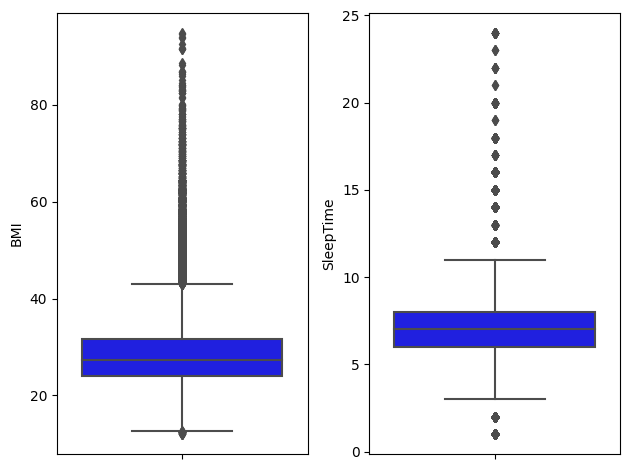

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='blue', orient='v')
    plt.tight_layout()

In [ ]:
print(f"Jumlah baris sebelum memfilter outlier:")
print(len(df))
nums_out = ['BMI','SleepTime']
for col in nums_out:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1
  low_limit = Q1 - 1.5*IQR
  high_limit = Q3 + 1.5*IQR
  df = df[(df[col] >= low_limit) & (df[col] <= high_limit)]

print(f"Jumlah baris setelah memfilter outlier:")
print(len(df))

Jumlah baris sebelum memfilter outlier:
301717
Jumlah baris setelah memfilter outlier:
288496


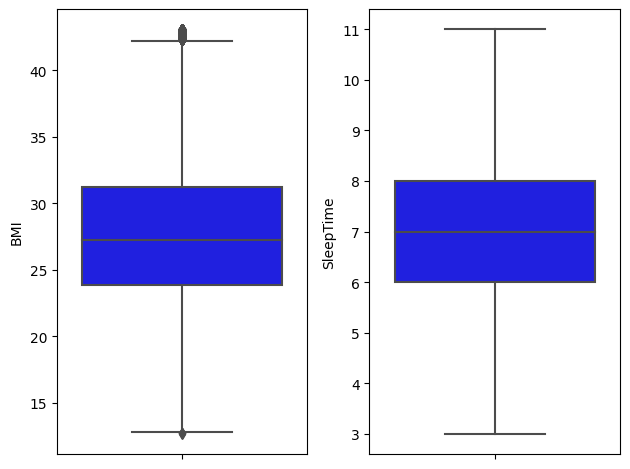

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='blue', orient='v')
    plt.tight_layout()

It looks better now without outliers

In [ ]:
df.select_dtypes(include='object').describe()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,ClassBMI
count,288496,288496,288496,288496,288496,288496,288496,288496,288496,288496,288496,288496,288496,288496,288496
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2,5
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No,Obesity 1
freq,262968,167064,267540,277291,249193,151597,30333,218794,242858,222976,102255,248956,277659,260071,104067


# Summary:
1. Most of the object column types have 2 categories except the age group has 13 categories and the BMI class has 5 categories
2. Most of the questionnaires related to indicators were filled with 'No' answers except for the Physical Activity column
3. There is an indication that imbalance data that look from the frequency of occurrence of the data

## EDA + Visualization

#Q1: What is the percentage of correspondence who filled out the survey by gender?
### Ans: The percentage of correspondents who filled out the survey was almost balanced with the percentage of women at 52.9% and about 47% for men

In [ ]:
q1 = df.groupby(['Sex'])['HeartDisease'].count()
q1

Sex
Female    151597
Male      136899
Name: HeartDisease, dtype: int64

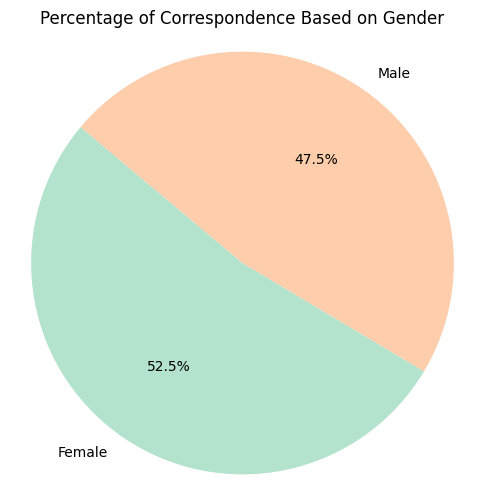

In [ ]:
plt.figure(figsize=(6, 6), facecolor='none')
plt.pie(q1, labels=q1.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel2.colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Correspondence Based on Gender')
plt.show()

#Q2 : How is the distribution of correspondent data with a history of CHD by sex?
## Insight:  **Based on the graph above, the history of coronary heart disease is dominated by men around 59.6%**

In [ ]:
q2 = df[df['HeartDisease']=='Yes'].groupby(['Sex','HeartDisease'])['HeartDisease'].count()
q2

Sex     HeartDisease
Female  Yes             10319
Male    Yes             15209
Name: HeartDisease, dtype: int64

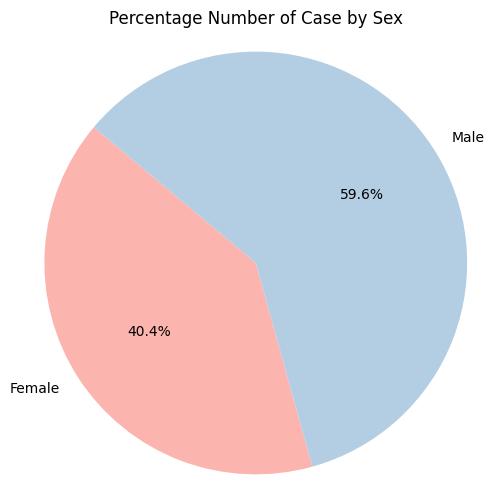

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(q2, labels=q1.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage Number of Case by Sex')
plt.show()

#Q3: What is the comparison of the number of CHD cases based on age and sex groups?
## Insight: Based on the graph, there has been increase gradually in the number of cases of coronary heart disease in men compared to women in the age range of 65 years and over.

In [ ]:
q3 = df[df['HeartDisease']=='Yes'].groupby(['AgeCategory','HeartDisease','Sex']).agg(number_of_cases=('HeartDisease','count')).reset_index()
q3

,AgeCategory,HeartDisease,Sex,number_of_cases
0,18-24,Yes,Female,46
1,18-24,Yes,Male,73
2,25-29,Yes,Female,61
3,25-29,Yes,Male,60
4,30-34,Yes,Female,83
5,30-34,Yes,Male,115
6,35-39,Yes,Female,132
7,35-39,Yes,Male,133
8,40-44,Yes,Female,219
9,40-44,Yes,Male,210


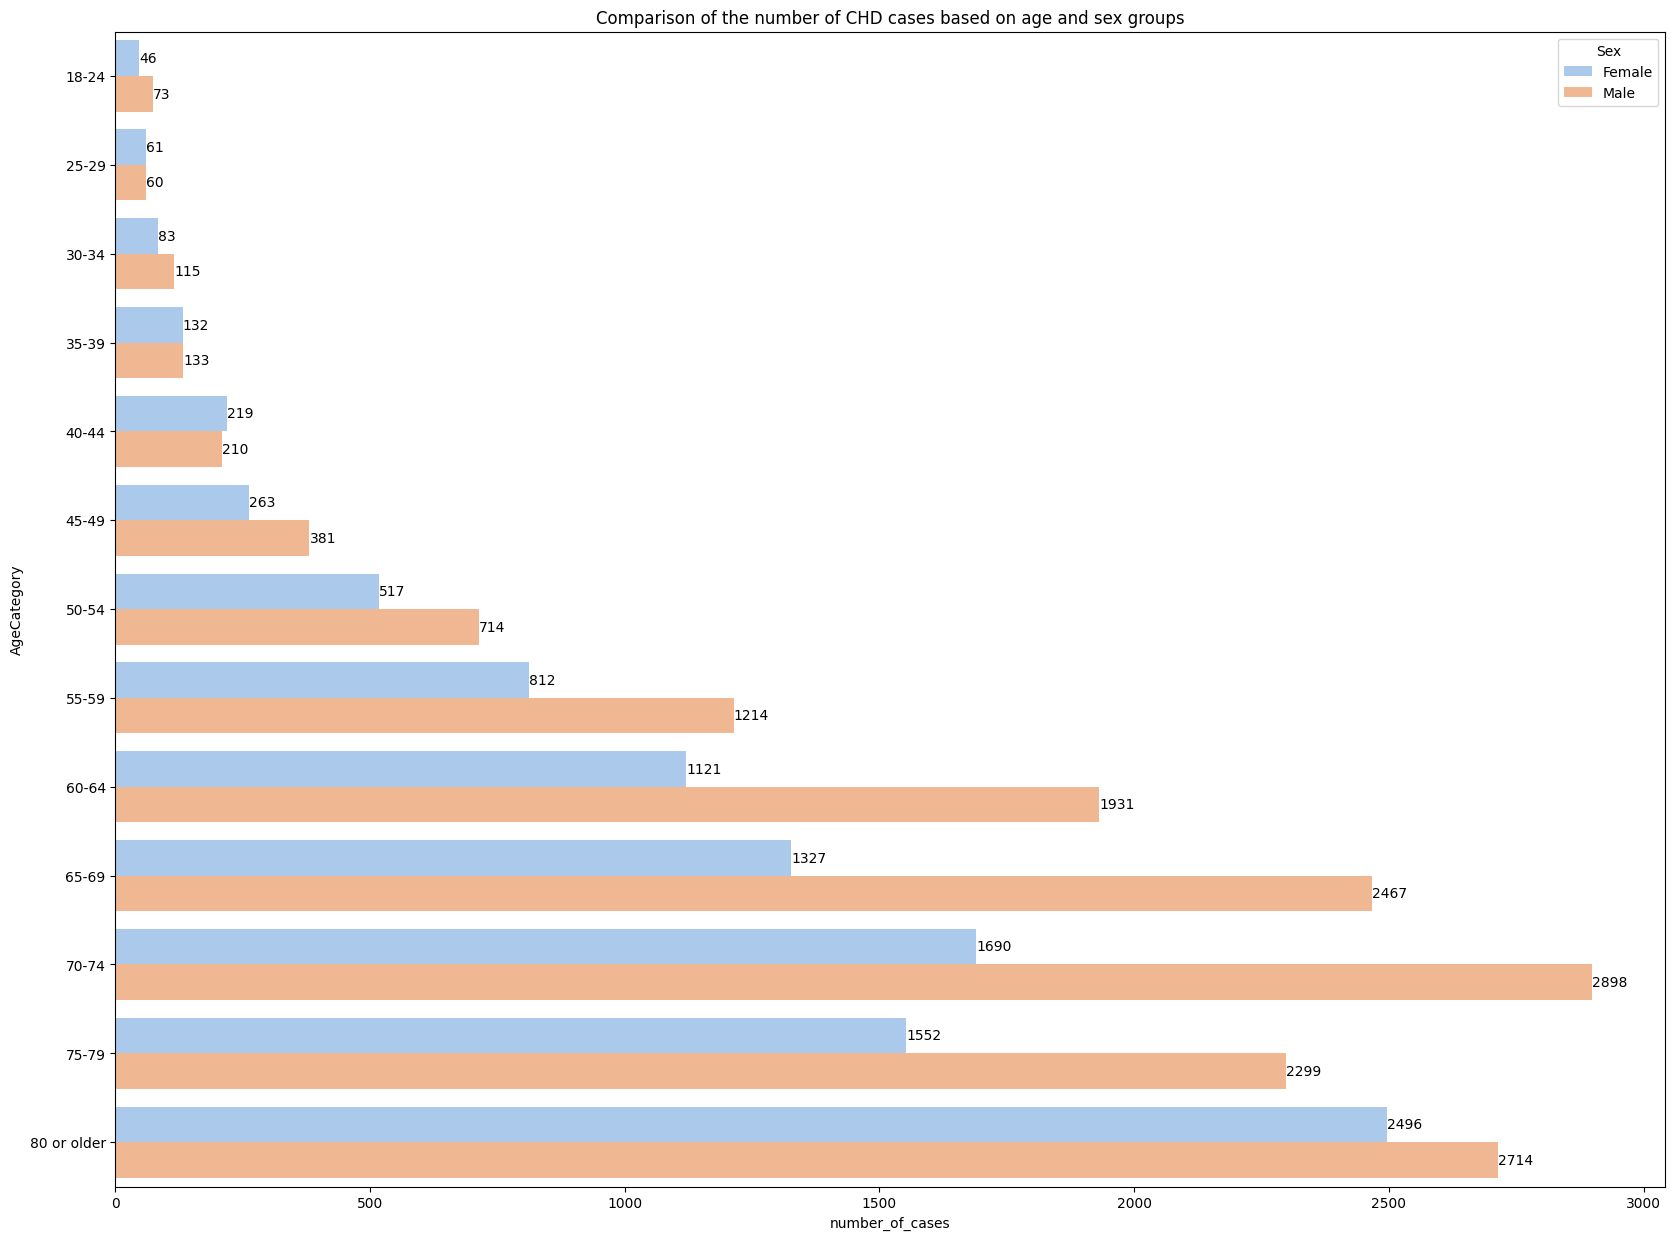

In [ ]:
plt.figure(figsize=(20, 15))
c1 = sns.barplot(y='AgeCategory', x='number_of_cases', hue='Sex', data=q3, palette='pastel')
c1.bar_label(c1.containers[0])
c1.bar_label(c1.containers[1])
plt.title('Comparison of the number of CHD cases based on age and sex groups')
plt.legend(title='Sex')
plt.show()

#Q4: What type of race has coronary heart disease?
## Answer:  According to the chart, the white race has the most coronary heart disease


In [ ]:
q4 = df[df['HeartDisease']=='Yes'].groupby(['Race','Sex']).agg(number_of_cases=('HeartDisease','count')).reset_index()
q4

,Race,Sex,number_of_cases
0,American Indian/Alaskan Native,Female,237
1,American Indian/Alaskan Native,Male,260
2,Asian,Female,83
3,Asian,Male,169
4,Black,Female,850
5,Black,Male,661
6,Hispanic,Female,651
7,Hispanic,Male,689
8,Other,Female,348
9,Other,Male,458


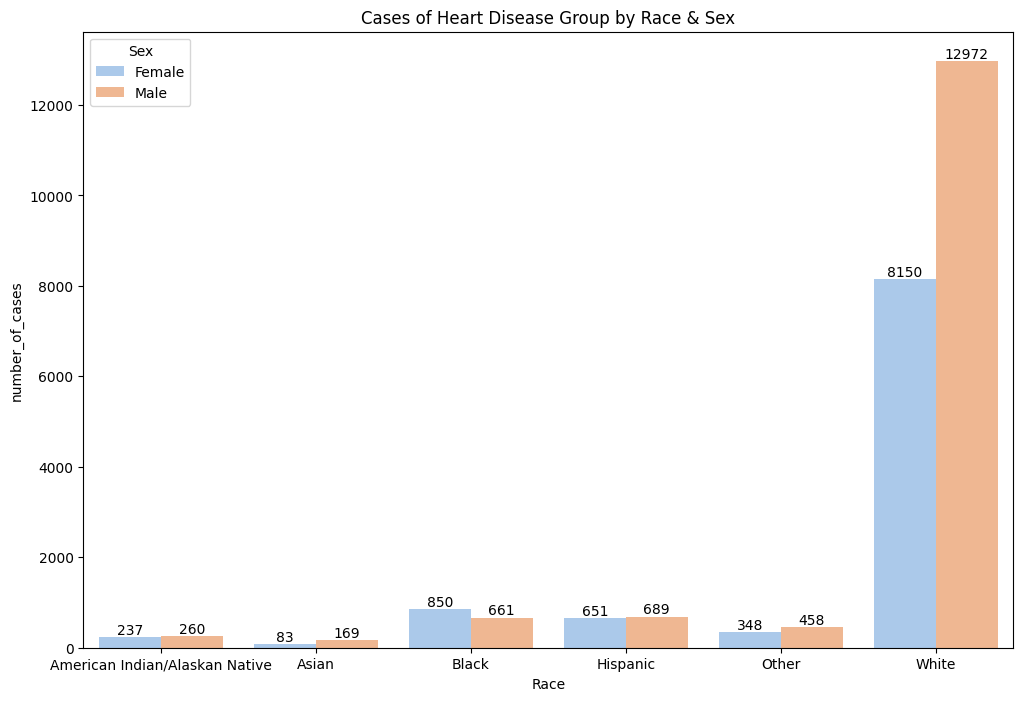

In [ ]:
plt.figure(figsize=(12,8))
c1 = sns.barplot(x='Race', y='number_of_cases', hue='Sex', data=q4, palette='pastel')
c1.bar_label(c1.containers[0])
c1.bar_label(c1.containers[1])
plt.title('Cases of Heart Disease Group by Race & Sex')
plt.legend(title='Sex')
plt.show()

# Q5: Does smoking increase the risk of coronary heart disease?
## Insight: Based on the chart shows that 56.8 percent of those with coronary heart disease are smokers

In [ ]:
q5 = df[df['HeartDisease']=='Yes'].groupby(['Smoking'])['HeartDisease'].count()
q5

Smoking
No     10565
Yes    14963
Name: HeartDisease, dtype: int64

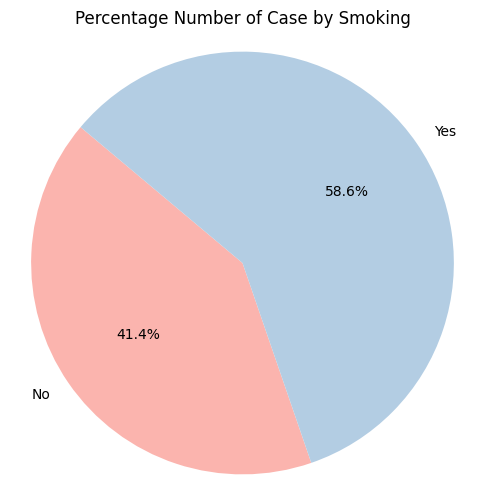

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(q5,labels=q5.index,autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage Number of Case by Smoking')
plt.show()

# Q6: Does drinking too much alcohol increase the risk of coronary heart disease?
## Insight: Based on the chart shows only 4.2 percent of those with coronary heart disease are alcohol drinker

In [ ]:
q6 = df[df['HeartDisease']=='Yes'].groupby(['AlcoholDrinking'])['HeartDisease'].count()
q6

AlcoholDrinking
No     24466
Yes     1062
Name: HeartDisease, dtype: int64

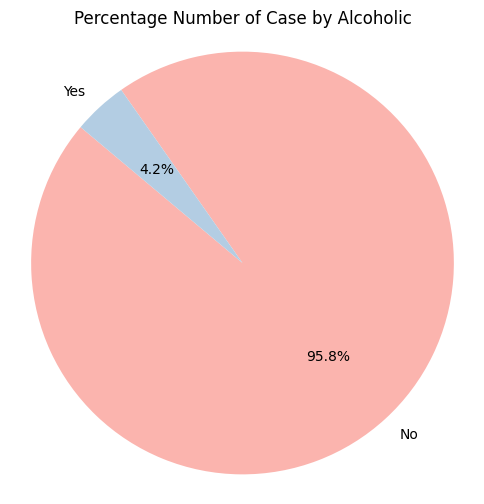

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(q6,labels=q5.index,autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage Number of Case by Alcoholic')
plt.show()

#Q7: Can a higher BMI increase the risk of coronary heart disease?
## Ans: Based on the chart shows that a high BMI increases the risk of heart attack

In [ ]:
q7 = df[df['HeartDisease']=='Yes'].groupby(['ClassBMI']).agg(number_of_cases=('HeartDisease','count')).reset_index()
q7

,ClassBMI,number_of_cases
0,Normal,3065
1,Obesity 1,9675
2,Obesity 2,9368
3,Overweight,3046
4,Underweight,374


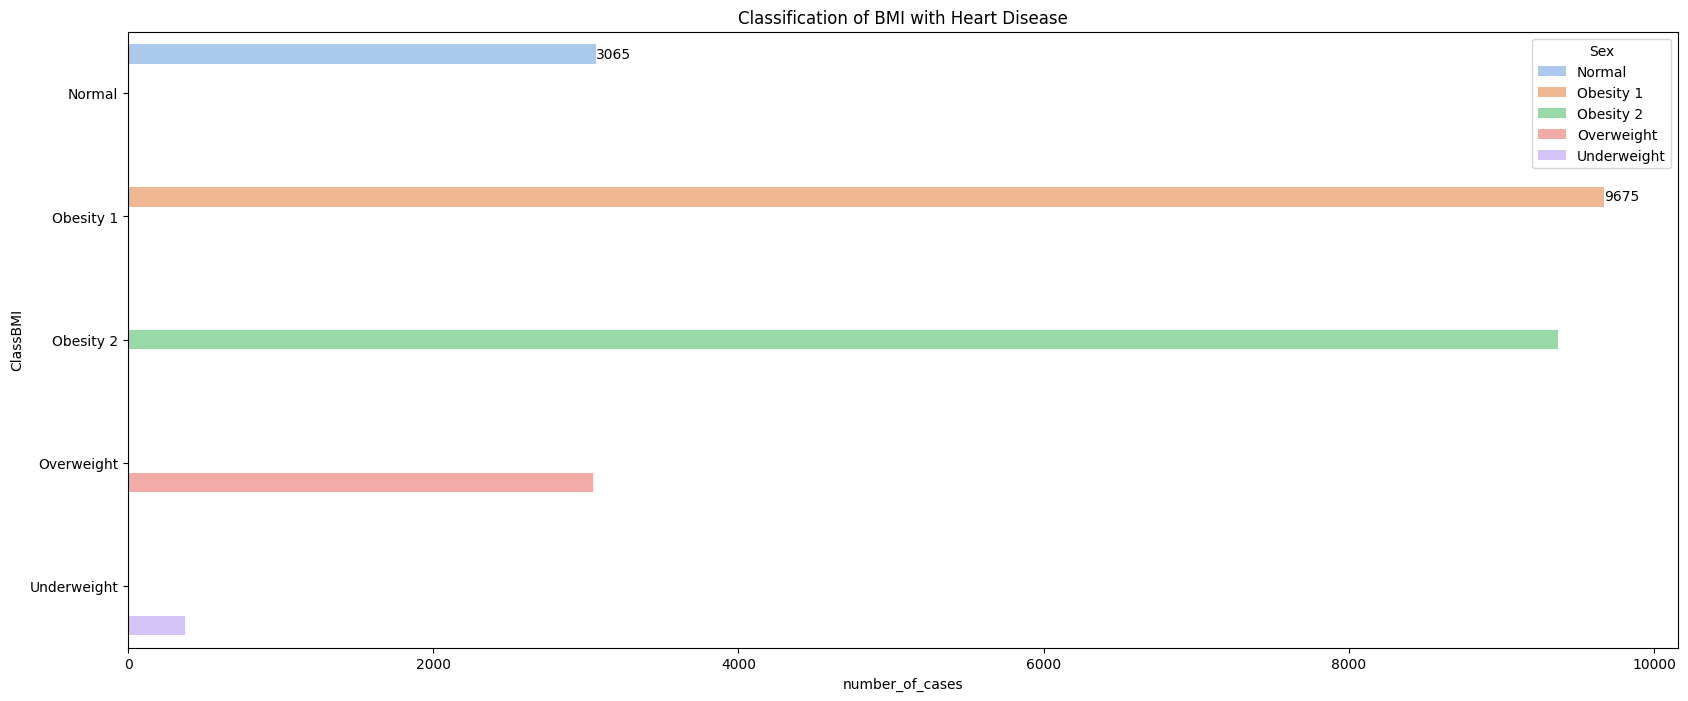

In [ ]:
plt.figure(figsize=(20,8))
c1 = sns.barplot(y='ClassBMI', x='number_of_cases', hue='ClassBMI', data=q7, palette='pastel')
c1.bar_label(c1.containers[0])
c1.bar_label(c1.containers[1])
plt.title('Classification of BMI with Heart Disease')
plt.legend(title='Sex')
plt.show()

#Conclusion

1. The number of correspondents is almost the same but most of the correspondents are women
2. Male sex has a higher risk of having a heart attack
3. There is a double increase in the risk of men suffering from heart disease in the age range of 65 years and more compared to women
4. The white race has the most heart attacks
5. Smoking can increase the risk of heart attack
6. Alcohol-induced heart attacks are extremely rare
7. Correspondents who have a BMI above 25 are at risk of having a heart attack

## Final Dataset

In [ ]:
#df.to_csv('book-clean.csv', index=False)
df.to_csv('/content/drive/MyDrive/clean_heart_data.csv', index=False)